# Import required modules and load data files

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
fruits = pd.read_table('fruit_data_with_colors.txt')

In [4]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))

In [6]:
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

# Create train-test split

In [7]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Create classifier object

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

# Train the classifier using the training data

In [9]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

# Estimate the accuracy of the classifier on future data, using the test data

In [10]:
knn.score(X_test, y_test)

0.5333333333333333

# Use the trained k-NN classifier model to classify, previously usneen objects

In [11]:
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [12]:
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

# plot the decision boundaries of the k-NN classifier

/Users/ritik/MachineLearning/project_1/adspy_shared_utilities.py:171: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  def plot_fruit_knn(X, y, n_neighbors, weights):
/Users/ritik/MachineLearning/project_1/adspy_shared_utilities.py:172: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_mat = X[['height', 'width']].as_matrix()


<IPython.core.display.Javascript object>


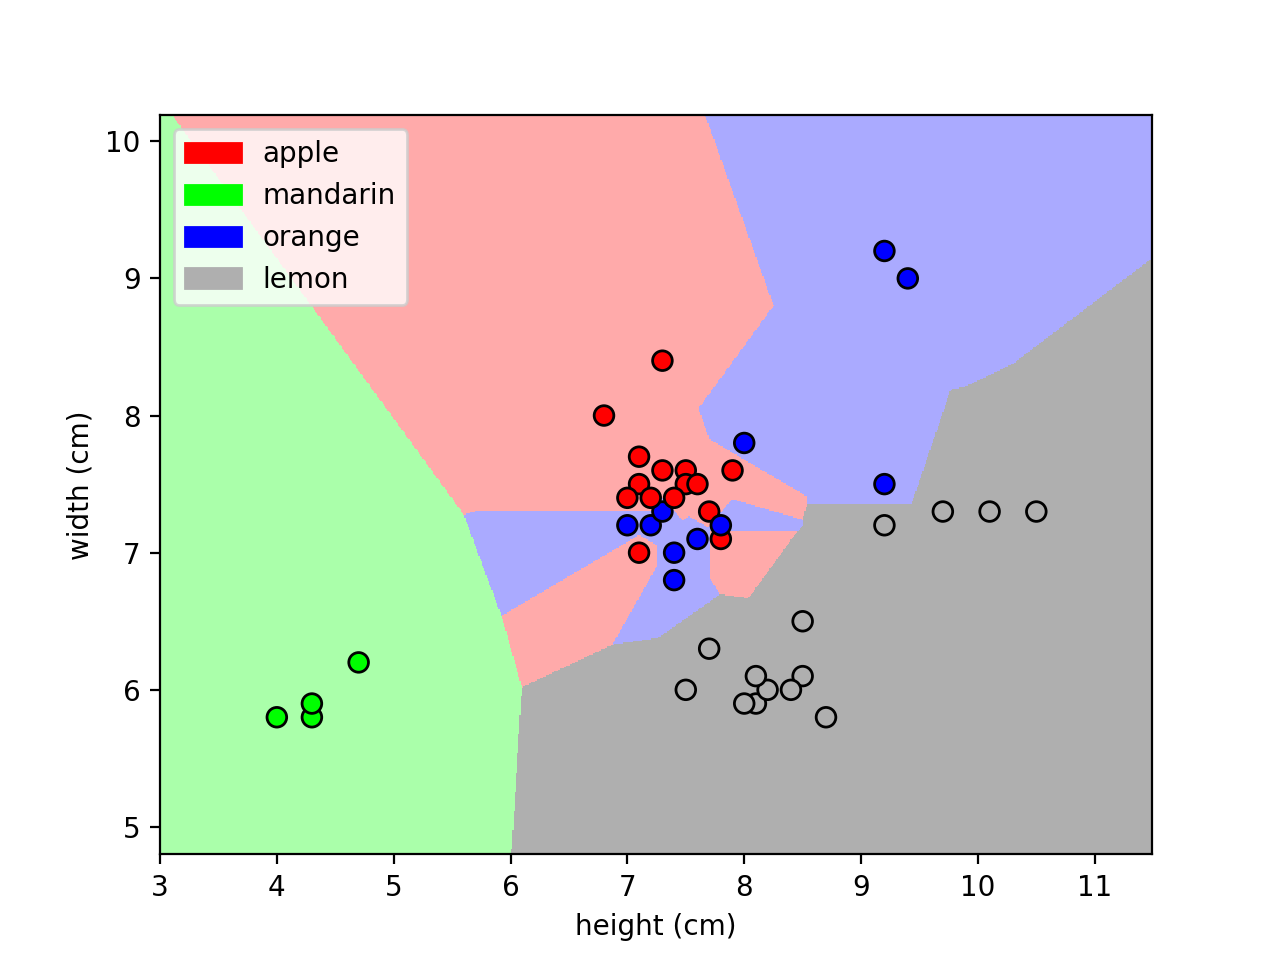

In [20]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 1, 'uniform')